In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv("train.csv")

# Show the first 5 rows
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing values
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Fill missing Age values with the median age
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)

# Drop the Cabin column completely
train_data.drop("Cabin", axis=1, inplace=True)

# Fill missing Embarked values with the most common port
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

# Confirm no more missing values
train_data.isnull().sum()


/var/folders/cc/4qwgw7xd3ks1phs76klcdt700000gn/T/ipykernel_13651/3927350081.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
/var/folders/cc/4qwgw7xd3ks1phs76klcdt700000gn/T/ipykernel_13651/3927350081.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
# Convert 'Sex' to numeric
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})

# Convert 'Embarked' to numeric
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [6]:
train_data[["Sex", "Embarked"]].head()


,Sex,Embarked
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [7]:
print("Unique values in 'Sex':", train_data["Sex"].unique())
print("Unique values in 'Embarked':", train_data["Embarked"].unique())



Unique values in 'Sex': [nan]
Unique values in 'Embarked': [nan]


In [8]:
# Reload original data (resets everything)
train_data = pd.read_csv("train.csv")

# Clean again quickly
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data.drop("Cabin", axis=1, inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

# Confirm clean
train_data.isnull().sum()


/var/folders/cc/4qwgw7xd3ks1phs76klcdt700000gn/T/ipykernel_13651/3299597123.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
/var/folders/cc/4qwgw7xd3ks1phs76klcdt700000gn/T/ipykernel_13651/3299597123.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
# Reload original
train_data = pd.read_csv("train.csv")

# Proper way to clean columns
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data = train_data.drop("Cabin", axis=1)
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

# Check if nulls are gone
train_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
print(train_data["Sex"].unique())
print(train_data["Embarked"].unique())


['male' 'female']
['S' 'C' 'Q']


In [11]:
# Convert 'Sex': male → 0, female → 1
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})

# Convert 'Embarked': S → 0, C → 1, Q → 2
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Check the results
train_data[["Sex", "Embarked"]].head()


,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0


In [12]:
# Select features and label
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]         # Features (inputs)
y = train_data["Survived"]       # Label (output)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7877094972067039


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8268156424581006


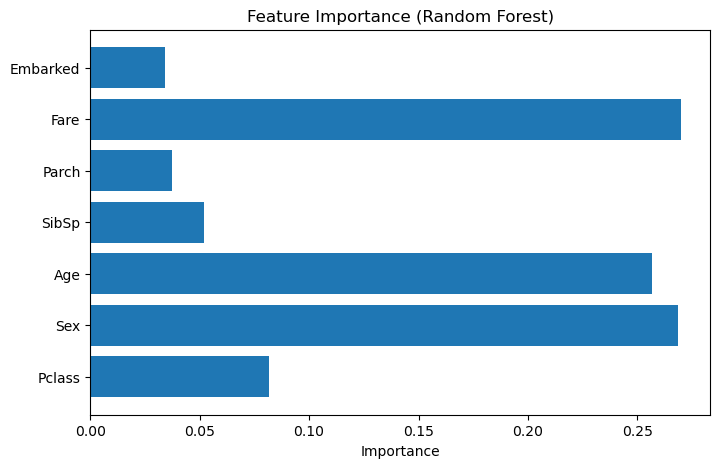

In [15]:
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter options to try
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Create base model
rf = RandomForestClassifier(random_state=42)


In [17]:
# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [18]:
# Print best hyperparameters and best model
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model on test set
best_rf = grid_search.best_estimator_
best_predictions = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score
best_accuracy = accuracy_score(y_test, best_predictions)
print("Best Model Accuracy:", best_accuracy)


Best Parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
Best Model Accuracy: 0.8100558659217877


In [1]:
import pandas as pd

# Load the data
train_data = pd.read_csv("train.csv")

# Clean missing values
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data = train_data.drop("Cabin", axis=1)
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

# Encode text columns
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [2]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]
y = train_data["Survived"]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
joblib.dump(best_rf, "titanic_model.pkl")


['titanic_model.pkl']

In [1]:
import joblib

# DO THIS: Load model using joblib.load()
model = joblib.load("titanic_model.pkl")
